In [51]:
!pip install rasterio matplotlib

### Introduction

All of the data is saved as GeoTIFF files. We will be using rasterio to view the data. Other libraries will work too.

We will brief cover all of the data in this notebook.

Each fire consists of the same data structures. In this notebook we will cover the data structure.

Each fire consists of multiple GeoTIFF files covering the same geographic area with the same shape. 

This data can be overlayed and be fed into a AI network to predict the fire growth. 

In [52]:
import numpy as np
import pandas as pd
import os
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

### Viewing fire growth data 

Fire growth data is saved in ./hackathon/fire/fire_train.tif. The data contains raster data covering day to day fire growth.

The goal of the challenge is to predict the future fire growth given the past fire growth and additional feature data.

In [53]:
path = "./"
fire_num = 2214
fire = path+f'/test/fire{fire_num}'

<open DatasetReader name='.//test/fire2214/fire/fire2214_train.tif' mode='r'>
213.0
222.0
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


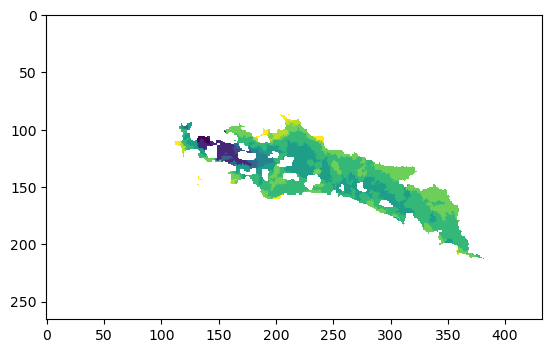

(266, 433)


In [54]:
tiff_file = fire+f'/fire/fire{fire_num}_train.tif'
img = rasterio.open(tiff_file)
print(img)
img_test = img.read(1)
print(np.nanmin(img_test))
print(np.nanmax(img_test))
plt.imshow(img_test)
print(img_test)
plt.show()

print(img.shape)

Fire growth data in fire_train.tif contains day to day fire growth data from day 1 to 5 (represented from values 1 to 5).

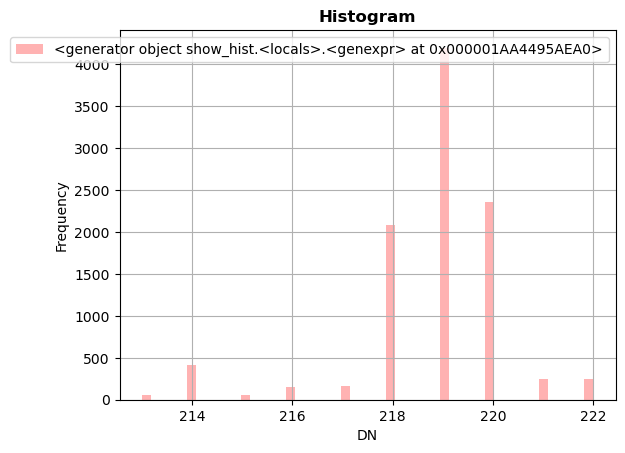

In [55]:
from rasterio.plot import show_hist

show_hist(
    img, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")

### Topography

Topography represents information of the landscape of the region where the fire is.

Topography consists of 2 variables:
- The Digital Elevation Model (DEM) - The digital elevation model is a computer representation of elevation data to represent terrain.
- Slope - The slope is a representation of the rate of change of elevation for each digital elevation model (DEM) cell. It is the first derivative of a DEM.

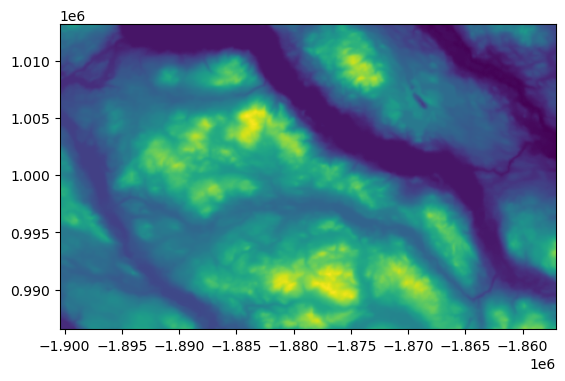

(266, 433)


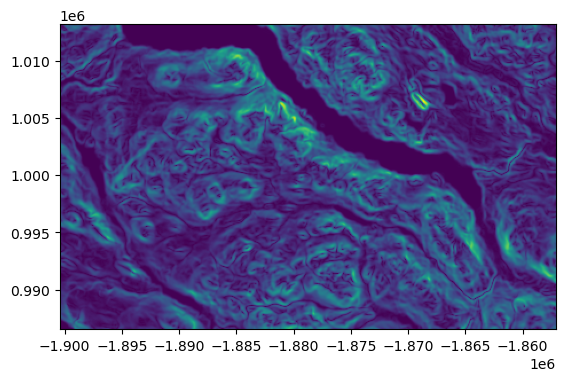

(266, 433)


In [56]:
tiff_file = fire+"/topography/dem.tif"
img = rasterio.open(tiff_file)
show(img)

print(img.shape)

tiff_file = fire+"/topography/slope.tif"
img = rasterio.open(tiff_file)
show(img)

print(img.shape)

### Fire Weather Index System

Fire weather System contains components from 6 index values. 
- Fine Fuel Moisture Code - The Fine Fuel Moisture Code (FFMC) is a numeric rating of the moisture content of litter and other cured fine fuels. This code is an indicator of the relative ease of ignition and the flammability of fine fuel.
- Duff Moisture Code - The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.
- Drought Code - The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.
- Initial Spread Index - The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It is based on wind speed and FFMC.
- Buildup Index - The Buildup Index (BUI) is a numeric rating of the total amount of fuel available for combustion. It is based on the DMC and the DC. 
- Fire Weather Index - The Fire Weather Index (FWI) is a numeric rating of fire intensity. It is based on the ISI and the BUI, and is used as a general index of fire danger throughout the forested areas of Canada.

Specific information on each index can be found here:
https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi

[[77.7 77.7 77.7 ... 76.7 76.7 76.8]
 [77.6 77.6 77.6 ... 76.7 76.7 76.7]
 [77.6 77.6 77.6 ... 76.7 76.7 76.7]
 ...
 [76.3 76.3 76.3 ... 78.2 78.2 78.2]
 [76.3 76.3 76.3 ... 78.3 78.3 78.3]
 [76.3 76.3 76.3 ... 78.4 78.5 78.5]]
[[433.4 433.5 433.5 ... 443.7 443.9 443.3]
 [433.8 433.9 433.7 ... 443.6 443.8 443.4]
 [434.  433.8 433.7 ... 443.8 443.9 443.7]
 ...
 [448.  448.  448.  ... 427.4 427.4 427.5]
 [448.  448.  448.  ... 426.2 426.1 426.1]
 [448.  448.  448.  ... 425.1 424.8 424.7]]
[[50.2 50.1 50.1 ... 49.  49.  49.1]
 [50.1 50.1 50.1 ... 49.1 49.  49.1]
 [50.1 50.1 50.1 ... 49.  49.  49. ]
 ...
 [48.6 48.6 48.6 ... 50.8 50.8 50.8]
 [48.6 48.6 48.6 ... 50.9 51.  50.9]
 [48.6 48.6 48.6 ... 51.1 51.1 51.1]]
[[85.4 85.4 85.4 ... 86.8 86.8 86.8]
 [85.4 85.5 85.4 ... 86.8 86.8 86.8]
 [85.5 85.5 85.4 ... 86.8 86.8 86.8]
 ...
 [87.4 87.4 87.4 ... 84.6 84.6 84.6]
 [87.4 87.4 87.4 ... 84.4 84.4 84.4]
 [87.4 87.4 87.4 ... 84.2 84.2 84.2]]
[[16.9 16.9 16.9 ... 19.8 19.8 19.6]
 [17.  17.  16.

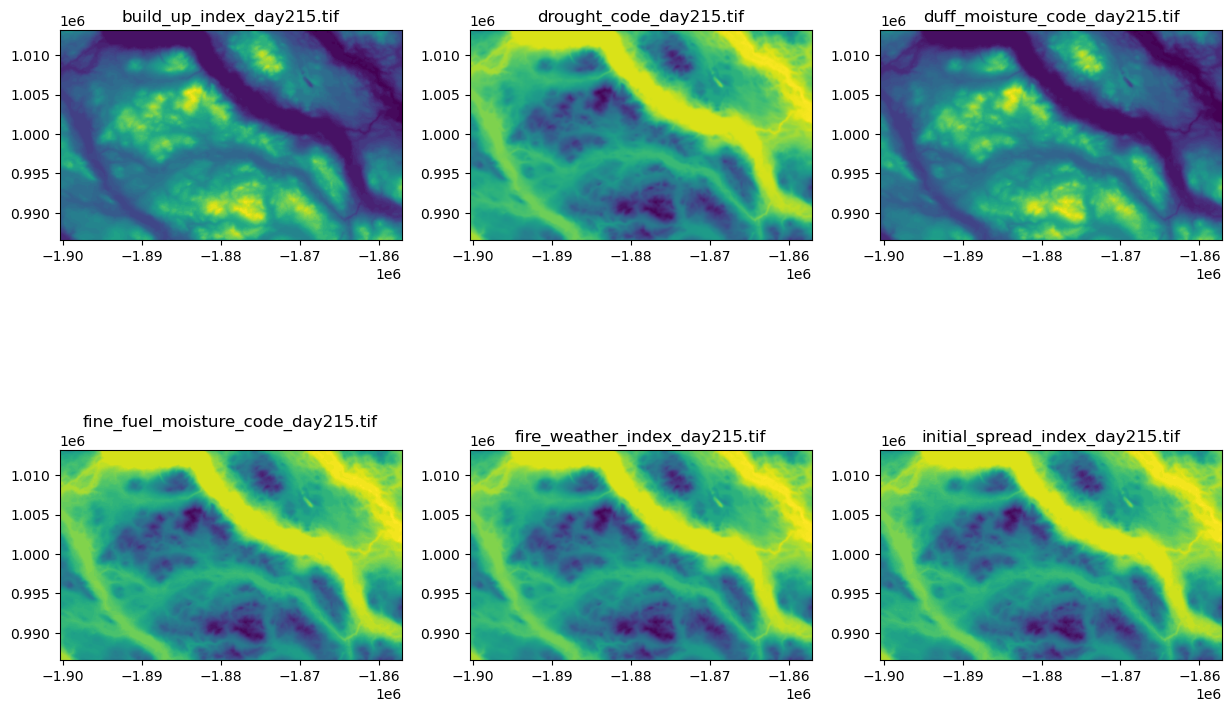

In [57]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import plotting_extent

day = 215

tiff_files = [
    fire+f'/fire_weather/build_up_index_day{day}.tif',
    fire+f'/fire_weather/drought_code_day{day}.tif',
    fire+f'/fire_weather/duff_moisture_code_day{day}.tif',
    fire+f'/fire_weather/fine_fuel_moisture_code_day{day}.tif',
    fire+f'/fire_weather/fire_weather_index_day{day}.tif',
    fire+f'/fire_weather/initial_spread_index_day{day}.tif'
]

fig, axs = plt.subplots(2,3, figsize=(15, 10))
for i in range(len(tiff_files)):
    ax = axs[i//3][i%3]
    tiff_file = tiff_files[i]
    with rasterio.open(tiff_file) as raster:
        extent = plotting_extent(raster)
        data = raster.read(1)
        print(data)
        ax.imshow(data, extent=extent)
        ax.set_title(tiff_file.split("/")[-1])
plt.show()


### Fire Behaviour Prediction (FBP) Fuel Types

FBP fuel types was derived primarily from forest attribute data (Beaudoin et al 2014) based on satellite imagery acquired by NASA's MODIS (Moderate Resolution Imaging Spectroradiometer) sensors. Fuel types were assigned based on vegetation type, tree species, crown closure, stand height, and other attributes. This fuels map gives only a general idea of the fuel types present and is not suitable for operational fire management because of the moderate resolution and limited scope of the input data.

Fuel type descriptions can be found here: https://cwfis.cfs.nrcan.gc.ca/background/fueltypes/c1

The lookup table between fuel type descriptions in fbp_fuels.tif and the fuel type descriptions can be found in the file:
'data/hackathon/fuels/fbp_lookup.csv'

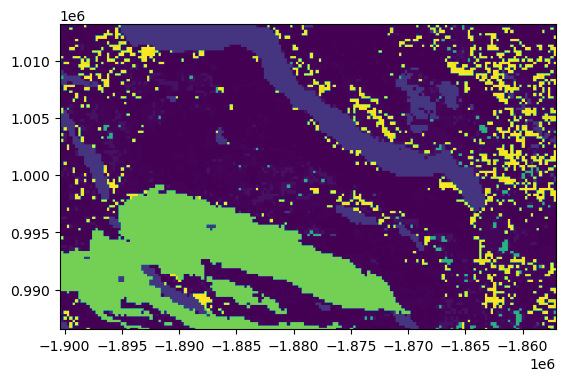

(266, 433)


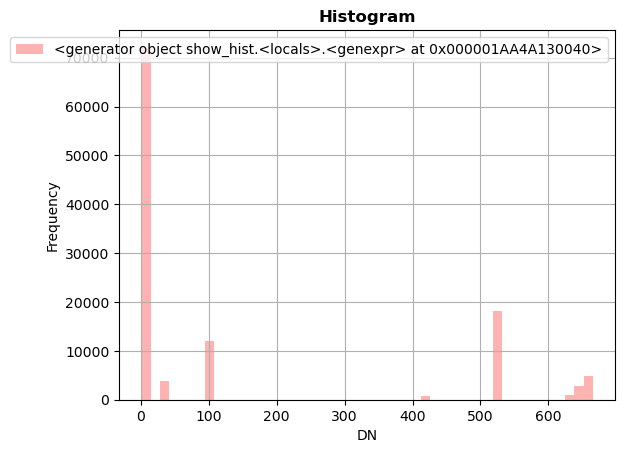

In [58]:
tiff_file = fire+"/fuels/fbp_fuels.tif"
img = rasterio.open(tiff_file)
show(img)

print(img.shape)

show_hist(
    img, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")

### Weather data

Weather is a primary contributor to how a fire grows. The following 5 weather variables are provided for the data:
- 24 hour max temperature
- noon relative humidity
- noon temperature
- noon wind direction
- noon wind speed

[[21.  21.  21.  ... 21.9 21.9 21.9]
 [21.1 21.1 21.1 ... 21.9 21.9 21.9]
 [21.1 21.1 21.1 ... 21.9 21.9 21.9]
 ...
 [22.3 22.3 22.3 ... 20.5 20.5 20.5]
 [22.3 22.3 22.3 ... 20.4 20.4 20.4]
 [22.3 22.3 22.3 ... 20.3 20.3 20.3]]
[[53.7 53.6 53.7 ... 49.8 49.7 50. ]
 [53.5 53.5 53.6 ... 49.8 49.8 49.9]
 [53.5 53.5 53.6 ... 49.8 49.7 49.8]
 ...
 [48.2 48.2 48.2 ... 55.9 56.  55.9]
 [48.2 48.2 48.2 ... 56.4 56.4 56.4]
 [48.2 48.2 48.2 ... 56.8 56.9 57. ]]
[[18.5 18.5 18.5 ... 19.3 19.3 19.3]
 [18.6 18.6 18.6 ... 19.3 19.3 19.3]
 [18.6 18.6 18.6 ... 19.3 19.3 19.3]
 ...
 [19.7 19.7 19.7 ... 18.1 18.1 18.1]
 [19.7 19.7 19.7 ... 18.  18.  18. ]
 [19.7 19.7 19.7 ... 17.9 17.9 17.9]]
[[251. 251. 251. ... 258. 258. 258.]
 [251. 251. 251. ... 258. 258. 258.]
 [251. 251. 251. ... 258. 258. 258.]
 ...
 [252. 252. 252. ... 260. 260. 260.]
 [252. 252. 252. ... 260. 260. 260.]
 [252. 252. 252. ... 260. 260. 260.]]
[[15.5 15.5 15.5 ... 16.3 16.3 16.3]
 [15.5 15.5 15.5 ... 16.3 16.3 16.3]
 [15.5 15.5 15

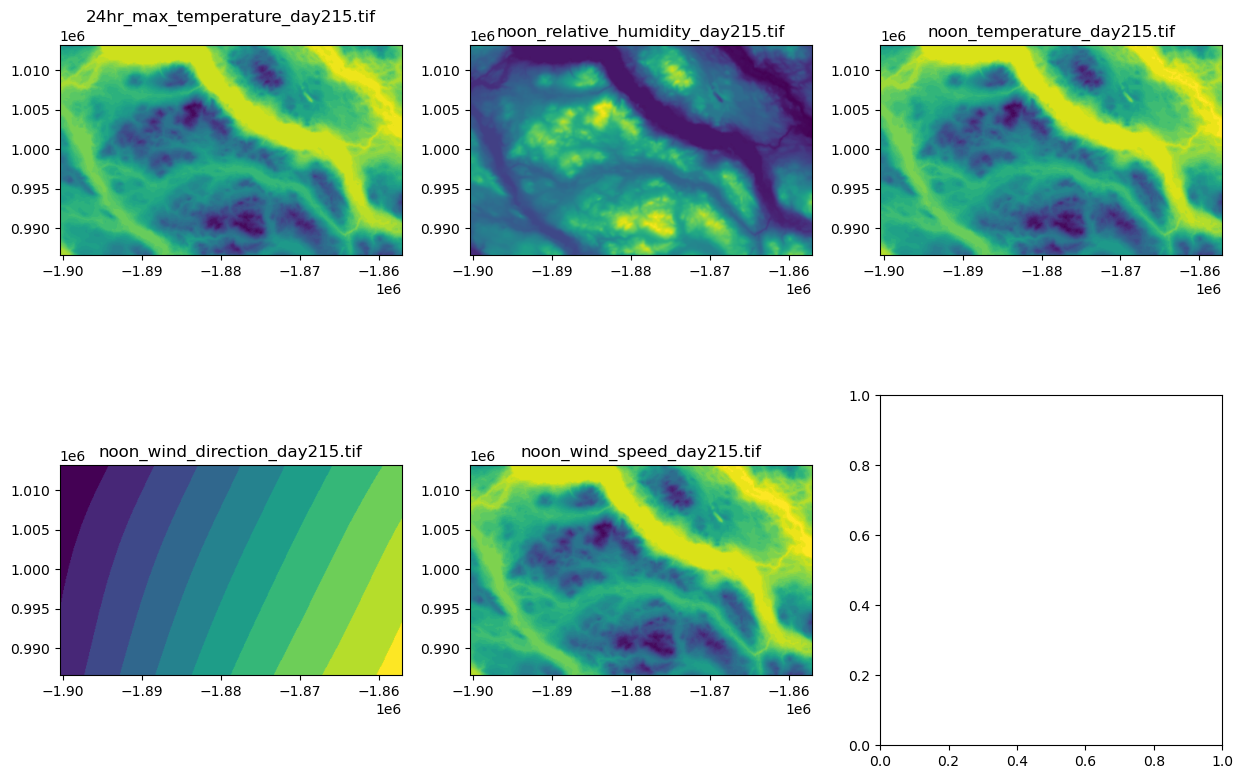

In [59]:
tiff_files = [
    fire+f'/weather/24hr_max_temperature_day{day}.tif',
    fire+f'/weather/noon_relative_humidity_day{day}.tif',
    fire+f'/weather/noon_temperature_day{day}.tif',
    fire+f'/weather/noon_wind_direction_day{day}.tif',
    fire+f'/weather/noon_wind_speed_day{day}.tif',
]

fig, axs = plt.subplots(2,3, figsize=(15, 10))
for i in range(len(tiff_files)):
    ax = axs[i//3][i%3]
    tiff_file = tiff_files[i]
    with rasterio.open(tiff_file) as raster:
        extent = plotting_extent(raster)
        data = raster.read(1)
        print(data)
        ax.imshow(data, extent=extent)
        ax.set_title(tiff_file.split("/")[-1])
plt.show()

In [60]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [61]:
print(gpd.__version__)

0.14.4


### Hotspot data

Saved in a shp file. Hotspot data can be viewed as a pandas dataframe. More information on specific columns can be found in the data tab of the kaggle competition.

In [62]:
# import geopandas as gpd

# shp_file = fire + "/Hotspots_2214_2018.shp"


# shape=gpd.read_file(shp_file)
# shape.plot()

# print(shape.columns)
# print(shape["sensor"][0:3], shape["satellite"][0:3], shape["agency"][0:3])